In [2]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cft
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc

import datetime, time, os, sys
from glob import glob
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.collections import LineCollection

In [3]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:40637 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [ ]:
import cosima_cookbook as cc
session = cc.database.create_session()

In [5]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_total.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont','025deg_jra55_ryf_nostress']
names = {'025deg_jra55_ryf_nostress_cont':'Control','025deg_jra55_ryf_nostress':'No Stress'}

In [12]:
dir = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output000/ocean'
file = os.path.join(dir,'ocean-3d-salt-1-monthly-mean-ym_1900_01.nc')

In [13]:
filename = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output001/ocean/ocean-3d-salt-1-monthly-mean-ym_1902_01.nc'
particles = nc.Dataset(filename)

In [14]:
particles

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filename: ocean-3d-salt-1-monthly-mean-ym_1902_01.nc
    title: ACCESS-OM2-025
    grid_type: mosaic
    grid_tile: 1
    history: 20200910T1226Z: /g/data/ik11/inputs/access-om2/bin/mppnccombine-fast -r -o ocean-3d-salt-1-monthly-mean-ym_1902_01.nc ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0000 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0001 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0002 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0003 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0004 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0005 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0006 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0007 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0008 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0009 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0010 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0011 ocean-3d-salt-1-monthly-mean-ym_1902_01.nc.0012 ocean-3d-salt-1-monthly-mean-ym_1902_

In [28]:
3+2

5

In [15]:
x_min = -90
x_max = 10
y_min = 10
y_max = 65
salt_buo = cc.querying.getvar(expt[1],'salt',session,start_time='1900-01-01',end_time = '1900-12-31').sel(st_ocean = 1, method = 'nearest').sel(
    time = slice('1900-01-01','1900-12-31'))#.sel(
#    xt_ocean = slice(x_min,x_max)).sel(yt_ocean = slice(y_min,y_max))#.sel(st_ocean = 3.5, method = 'nearest')

In [ ]:
fig = plt.figure(1,figsize=(12,6.5))
fig.patch.set_facecolor('white')
ax = plt.axes(projection=ccrs.Stereographic(central_longitude=0,central_latitude=0))
ax.coastlines(resolution='50m')
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='gray')
ax.add_feature(land_50m)
#ax.add_feature(cft.LAND)

data = xr.open_dataset(file)
lons = data.xt_ocean
lats = data.yt_ocean

plt.pcolormesh(lons, lats, data.salt, cmap=plt.cm.magma, vmin=0, vmax=0.7, transform=ccrs.PlateCarree())
plt.subplots_adjust(left=0., right=1.0, top=1.0, bottom=0.0)

## Second attempt

In [72]:
A = [1,2,3,4]
Z = np.reshape(X, (1080,1440))

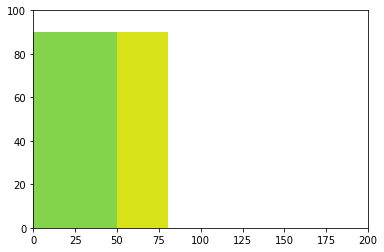

In [113]:
fig = plt.subplot()
ax = plt.axes(xlim=(0, 200), ylim=(0, 100))
cont = ax.contourf(X,Y,Z)
#line, = ax.plot([], [], lw=2)

In [114]:
x = salt_buo.xt_ocean
y = salt_buo.yt_ocean
X,Y = np.meshgrid(x,y)

In [115]:
def init():
    salt_val = salt_buo.sel(time = slice(salt_buo.time[0], salt_buo.time[0])).mean('time').values
    step1 = plt.contourf(X,Y,salt_val)
    return step1

In [116]:
# animation function.  This is called sequentially
def animate(i):
    salt_val = salt_buo.sel(time = slice(salt_buo.time[i], salt_buo.time[i])).mean('time').values
    stepi = plt.contourf(X,Y,salt_val)
    return stepi

AttributeError: 'AxesSubplot' object has no attribute 'canvas'

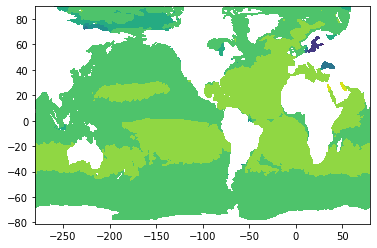

In [117]:
#anim = animation.FuncAnimation(fig, animate,
#                               frames=25, interval=1, blit=True)
for i in range(1,3):
    anim = animation.FuncAnimation(fig, animate(i), init_func=init,
                           frames=100, interval=1, blit=False)
    anim.save('us.gif', writer='imagemagick', fps=5)
#anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

In [91]:
salt_val = salt_buo.sel(time = slice(salt_buo.time[i], salt_buo.time[i])).mean('time').values
step1 = plt.contourf(X,Y,salt_val)

NameError: name 'i' is not defined

In [99]:
salt_val = salt_buo.sel(time = slice(salt_buo.time[i], salt_buo.time[i])).mean('time').values
stepi = ax.contourf(X,Y,salt_val)
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [96]:
i = 1

## Third try using Andy's version

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime, time, os, sys
from glob import glob
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.collections import LineCollection

import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cft
import xarray as xr
from matplotlib import rc
rc('animation', html='html5')

In [4]:
dir = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output001/ocean'
file = os.path.join(dir,'ocean-3d-salt-1-monthly-mean-ym_1902_01.nc')
data = xr.open_dataset(file)

In [5]:
filename = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output000/ocean/ocean-3d-salt-1-monthly-mean-ym_1900_01.nc'
particles = nc.Dataset(filename)
lon1 = particles.variables['xt_ocean'][:] 
lat1 = particles.variables['yt_ocean'][:]
time1 = particles.variables['time'][:]

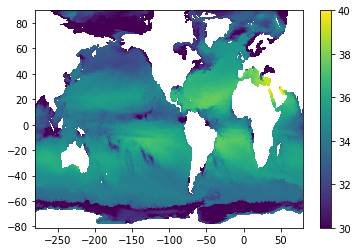

In [6]:
salt_sfc = data.salt.sel(st_ocean = 1,method = 'nearest')#.sel.(xt_ocean = slice(minlat,maxlat)).sel(yt_ocean = slice(minlon,maxlon))
ssh_Jan = salt_sfc.sel(time = slice('1902-01-01','1902-01-31')).mean('time').values
X,Y = np.meshgrid(lon1,lat1)
plt.pcolormesh(X, Y, ssh_Jan, vmin = 30, vmax = 40, shading = 'auto')
plt.colorbar()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


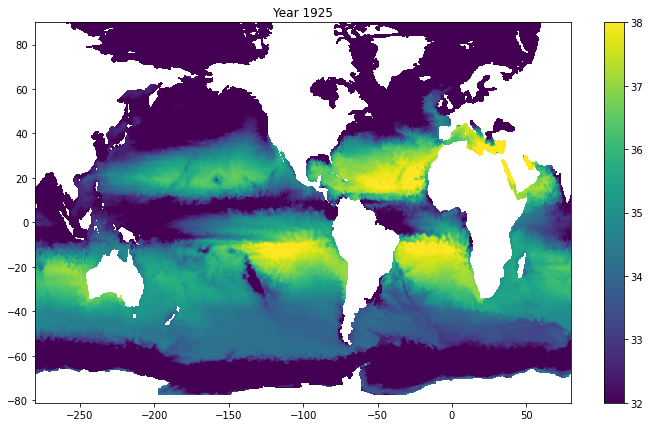

In [7]:
nframes = 312
startframe = 1
frames_plot = []
fig = plt.figure(1,figsize=(12,7))
nt = 1

def updatefig(nt):
#for nt in range(0,nframes):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + np.floor((currentframe-1)/12)
    #day = np.mod(currentframe-1,365)+1

    iter = 'ocean-3d-salt-1-monthly-mean-ym_%4d_01.nc' % (year)

    d = np.floor((year - 1900)/2)
    if d <= 9:
        dir = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output00%d/ocean' % d
    else:
        dir = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output0%d/ocean' % d

    file = os.path.join(dir,iter)

    data = xr.open_dataset(file)
    month = nt%12
    salt_sfc = data.salt.sel(time = slice(data.salt.time[month], data.salt.time[month])).mean('time').sel(st_ocean = 1, method = 'nearest').values
    fig = plt.figure(1,figsize=(12,7))
    p1 = plt.pcolormesh(X, Y, salt_sfc, vmin = 32, vmax = 38, shading = 'auto')
    plt.colorbar()
    plt.title('Year %4d' % year)

    filestr = '/home/156/db6174/x77/Test_Notebooks/Salinity_Buoyancy_Fig/image%04d.png' % nt
    plt.savefig(filestr,dpi=300)
    print(nt)
    #nt = nt + 1        
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='Southern Ocean Movie', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=8, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('SouthernOceanMovie.m4v', writer=ffwriter)

plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


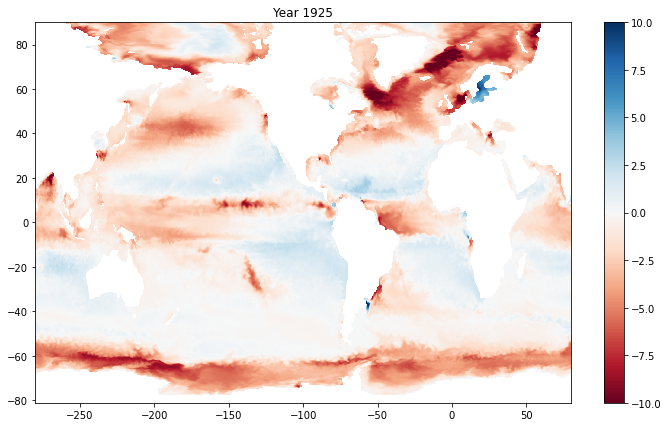

In [13]:
#Month averaged difference

nframes = 312
startframe = 1
fig = plt.figure(1,figsize=(12,7))
nt = 1

def updatefig(nt):
#for nt in range(0,nframes):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + np.floor((currentframe-1)/12)
    #day = np.mod(currentframe-1,365)+1

    iter1 = 'ocean-3d-salt-1-monthly-mean-ym_%4d_01.nc' % (year)
    iter2 = 'ocean-3d-salt-1-monthly-mean-ym_%4d_01.nc' % (year)

    d = np.floor((year - 1900)/2)
    if d <= 9:
        dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output00%d/ocean' % d
        dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont/output00%d/ocean' % d
    else:
        dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output0%d/ocean' % d
        dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont/output0%d/ocean' % d

    file1 = os.path.join(dir1,iter1)
    file2 = os.path.join(dir2,iter2)

    data1 = xr.open_dataset(file1)
    data2 = xr.open_dataset(file2)
    month = nt%12
    salt_sfc = data1.salt.sel(time = slice(data1.salt.time[month], data1.salt.time[month])).mean('time').sel(
        st_ocean = 1, method = 'nearest').values - data2.salt.sel(time = slice(data2.salt.time[month], data2.salt.time[month])).mean('time').sel(
        st_ocean = 1, method = 'nearest').values
    fig = plt.figure(1,figsize=(12,7))
    p1 = plt.pcolormesh(X, Y, salt_sfc, vmin = -10, vmax = 10, shading = 'auto', cmap = 'RdBu')
    plt.colorbar()
    plt.title('Year %4d' % year)

    filestr = '/home/156/db6174/x77/Test_Notebooks/Salinity_Buoyancy_Fig/image%04d.png' % nt
    plt.savefig(filestr,dpi=300)
    print(nt)
    #nt = nt + 1        
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='Salinity_differences', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=8, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('Salt_Diff.m4v', writer=ffwriter)

plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


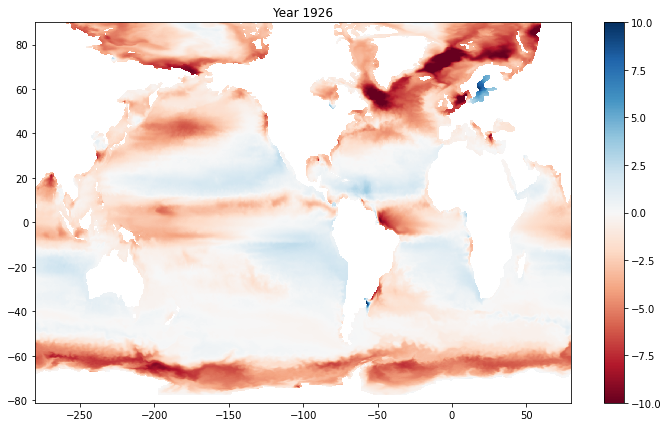

In [14]:
#Year averaged difference

nframes = 27
startframe = 1
fig = plt.figure(1,figsize=(12,7))
nt = 1

def updatefig(nt):
#for nt in range(0,nframes):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + nt#np.floor((currentframe-1)/12)
    #day = np.mod(currentframe-1,365)+1

    iter1 = 'ocean-3d-salt-1-monthly-mean-ym_%4d_01.nc' % (year)
    iter2 = 'ocean-3d-salt-1-monthly-mean-ym_%4d_01.nc' % (year)

    d = np.floor((year - 1900)/2)
    if d <= 9:
        dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output00%d/ocean' % d
        dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont/output00%d/ocean' % d
    else:
        dir1 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress/output0%d/ocean' % d
        dir2 = '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont/output0%d/ocean' % d

    file1 = os.path.join(dir1,iter1)
    file2 = os.path.join(dir2,iter2)

    data1 = xr.open_dataset(file1)
    data2 = xr.open_dataset(file2)
    month = nt%12
    salt_sfc = data1.salt.sel(st_ocean = 1, method = 'nearest').mean('time').values - data2.salt.sel(st_ocean = 1, method = 'nearest').mean('time').values
    fig = plt.figure(1,figsize=(12,7))
    p1 = plt.pcolormesh(X, Y, salt_sfc, vmin = -10, vmax = 10, shading = 'auto', cmap = 'RdBu')
    plt.colorbar()
    plt.title('Year %4d' % year)

    filestr = '/home/156/db6174/x77/Test_Notebooks/Salinity_Buoyancy_Fig/image%04d.png' % nt
    plt.savefig(filestr,dpi=300)
    print(nt)
    #nt = nt + 1        
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='Salinity_differences_Yearly', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=4, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('Salt_Diff_Year.m4v', writer=ffwriter)

plt.show()